# Limit cycles

In [204]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [295]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from scipy.integrate import odeint

from phase_space_plotting import plot_traj, plot_field

## Examples

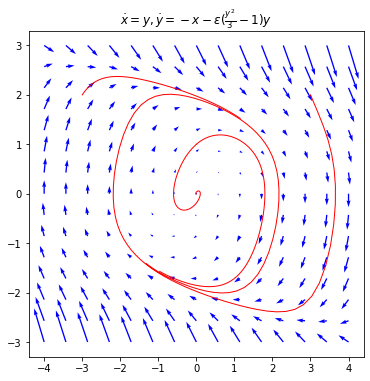

In [3]:
xlim = (-4, 4)
ylim = (-3, 3)

def dx_dt(x, t):
    epsilon = 1.0
    
    return [x[1], - x[0] - epsilon*(x[1]**2 / 3 - 1)*x[1]]

plt.figure(figsize=(6, 6))
plt.title('$\\dot{x} = y, \\dot{y} = -x -\\epsilon(\\frac{y^2}{3} - 1)y$')

plot_traj([3, 2], dx_dt, fw=10, bw=0, n_time_samples=100)
plot_traj([-3, 2], dx_dt, fw=2, bw=0, n_time_samples=100)
plot_traj([0, 1], dx_dt, fw=4, bw=-10, n_time_samples=100)

plot_field(dx_dt, xlim, ylim, scale=100)

plt.xlim(np.array(xlim) * 1.1)
plt.ylim(np.array(ylim) * 1.1)

plt.show()

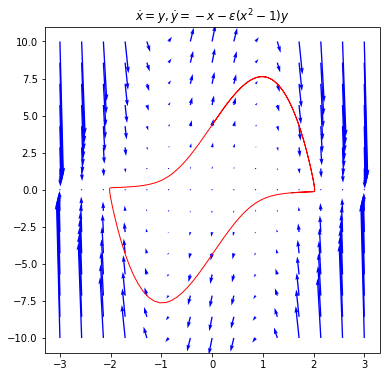

In [4]:
xlim = (-3, 3)
ylim = (-10, 10)

def dx_dt(x, t):
    epsilon = 5.0
    
    return [x[1], - x[0] - epsilon*(x[0]**2 - 1)*x[1]]

plt.figure(figsize=(6, 6))
plt.title('$\\dot{x} = y, \\dot{y} = -x -\\epsilon(x^2 - 1)y$')

plot_traj([0.03864691, 4.56820213], dx_dt, fw=15, bw=0, n_time_samples=1000)

plot_field(dx_dt, xlim, ylim, scale=1000)

plt.xlim(np.array(xlim) * 1.1)
plt.ylim(np.array(ylim) * 1.1)

plt.show()

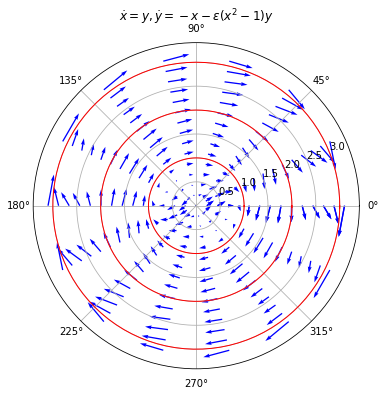

In [79]:
xlim = (0, 2*np.pi)
ylim = (0, 3.1)

def dx_dt(x, t):
    return [-1, x[1]*(1 - x[1])*(2 - x[1])*(3 - x[1])]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='polar')
ax.set_title('$\\dot{x} = y, \\dot{y} = -x -\\epsilon(x^2 - 1)y$')

plot_traj([0, 1], dx_dt, fw=6.3, bw=0, n_time_samples=100, ax=ax)
plot_traj([0, 2], dx_dt, fw=6.3, bw=0, n_time_samples=100, ax=ax)
plot_traj([0, 3], dx_dt, fw=6.3, bw=0, n_time_samples=100, ax=ax)

plot_field(dx_dt, xlim, ylim, scale=40, ax=ax, polar=True)

ax.set_xlim(xlim)
ax.set_ylim(np.array(ylim) * 1.1)

plt.show()

## Poincaré-Bendixson theorem

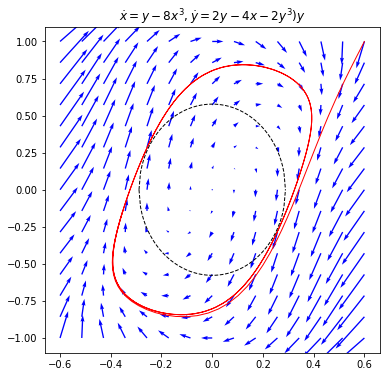

In [86]:
xlim = (-0.6, 0.6)
ylim = (-1, 1)

def dx_dt(x, t):
    return [x[1] - 8*x[0]**3, 2*x[1] - 4*x[0] -2*x[1]**3]

plt.figure(figsize=(6, 6))
plt.title('$\\dot{x} = y - 8x^3, \\dot{y} = 2y -4x - 2y^3)y$')

plot_traj([0.6, 1], dx_dt, fw=10, bw=0, n_time_samples=200)

plot_field(dx_dt, xlim, ylim, scale=30)

plt.xlim(np.array(xlim) * 1.1)
plt.ylim(np.array(ylim) * 1.1)

xx = np.linspace(-np.sqrt(1/12), np.sqrt(1/12), 100)
plt.plot(xx, np.sqrt((1 - 12*xx**2)/3), color='black', linestyle='--', linewidth=1)
plt.plot(xx, -np.sqrt((1 - 12*xx**2)/3), color='black', linestyle='--', linewidth=1)

plt.show()

### Non-convex limit cycle

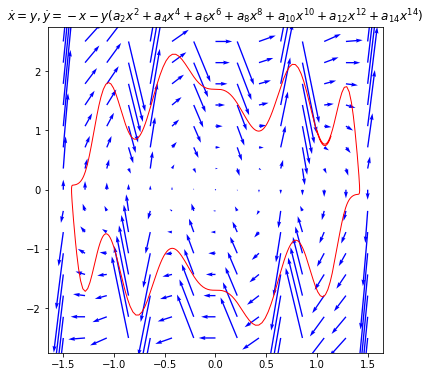

In [110]:
xlim = (-1.5, 1.5)
ylim = (-2.5, 2.5)

def dx_dt(x, t):
    a2, a4, a6, a8, a10, a12, a14 = 90, -882, 2598.4, -3359.997, 2133.34, -651.638, 76.38
    return [x[1], -x[0] -x[1]*(a2*x[0]**2 + a4*x[0]**4 + a6*x[0]**6 + a8*x[0]**8 + a10*x[0]**10 + a12*x[0]**12 + a14 * x[0]**14)]

plt.figure(figsize=(6, 6))
plt.title('$\\dot{x} = y, \\dot{y} = -x -y(a_2x^2 + a_4x^4 + a_6x^6 + a_8x^8 + a_{10}x^{10} + a_{12}x^{12} + a_{14}x^{14})$')

plot_traj([1, 1], dx_dt, fw=7, bw=0, n_time_samples=500)

plot_field(dx_dt, xlim, ylim, scale=50)

plt.xlim(np.array(xlim) * 1.1)
plt.ylim(np.array(ylim) * 1.1)

plt.show()

## Perturbation methods

In [235]:
x0, x1, x2, x, x_real = map(sp.Function, ['x0', 'x1', 'x2', 'x', 'x_real'])
t, eps = map(sp.Symbol, ['t', 'eps'])

x = x0(t) + eps*x1(t) + eps**2*x2(t)
expr = x.diff(t) + x - eps*x**2
equations = list(reversed(sp.Poly(expr, eps).coeffs()))[:3]
for eq in equations:
    display(eq)

x0(t) + Derivative(x0(t), t)

-x0(t)**2 + x1(t) + Derivative(x1(t), t)

-2*x0(t)*x1(t) + x2(t) + Derivative(x2(t), t)

In [236]:
x0_val, x1_val = map(lambda eq: eq.rhs, sp.dsolve(equations[:2], [x0(t), x1(t)], ics={x0(0): 2, x1(0): 0}))

x2_val = sp.dsolve(equations[2].subs({x0(t): x0_val, x1(t): x1_val}), x2(t), ics={x2(0): 0}).rhs

In [237]:
o0, o1, o2 = map(lambda expr: sp.lambdify(t, expr.subs({eps: 0.3})), [x0_val, x0_val + eps * x1_val, x0_val + eps * x1_val + eps**2*x2_val])

x_real_sol = sp.dsolve(x_real(t).diff(t) + x_real(t) - eps*x_real(t)**2, ics={x_real(0): 2})

real_x = sp.lambdify(t, x_real_sol.subs({eps: 0.3}).rhs)

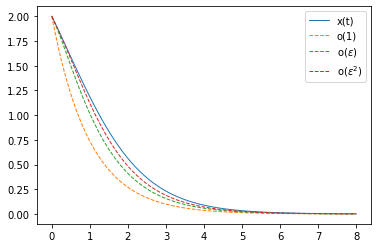

In [239]:
t = np.linspace(0, 8, 100)

plt.plot(t, real_x(t), label='x(t)', linewidth=1)

for name, o in zip(['o(1)', 'o($\\epsilon$)', 'o($\\epsilon^2$)'], [o0, o1, o2]):
    plt.plot(t, o(t), label=name ,linestyle='--', linewidth=1)
    
plt.legend()
plt.show()

### Duffing's equation

#### Solution with pure perturbation

In [327]:
x0, x1, x2, x = map(sp.Function, ['x0', 'x1', 'x2', 'x'])
t, eps = map(sp.Symbol, ['t', 'eps'])

x = x0(t) + eps*x1(t) + eps**2*x2(t)
expr = x.diff(t, 2) + x - eps*x**3
equations = list(reversed(sp.Poly(expr, eps).coeffs()))[:3]
for eq in equations:
    display(eq)

x0(t) + Derivative(x0(t), (t, 2))

-x0(t)**3 + x1(t) + Derivative(x1(t), (t, 2))

-3*x0(t)**2*x1(t) + x2(t) + Derivative(x2(t), (t, 2))

In [328]:
%%time
x0_val = sp.dsolve(equations[0], x0(t), ics={x0(0): 1, x0(t).diff(t).subs({t: 0}): 0}).rhs
x1_val = sp.dsolve(equations[1].subs({x0(t): x0_val}), x1(t), ics={x1(0): 0, x1(t).diff(t).subs({t: 0}): 0}).rhs
x2_val = sp.dsolve(equations[2].subs({x0(t): x0_val, x1(t): x1_val}), x2(t), ics={x2(0): 0, x2(t).diff(t).subs({t: 0}): 0}).rhs

CPU times: user 34.2 s, sys: 4 ms, total: 34.2 s
Wall time: 34.2 s


In [329]:
o0, o1, o2 = map(lambda expr: sp.lambdify(t, expr.subs({eps: 0.01})), [x0_val, x0_val + eps * x1_val, x0_val + eps * x1_val + eps**2*x2_val])

In [359]:
def dx_dt(x, t):
    return [x[1], -x[0] + 0.01*x[0]**3]

t = np.linspace(0, 500, 1000)
x_real_sol = odeint(dx_dt, [1, 0], t)

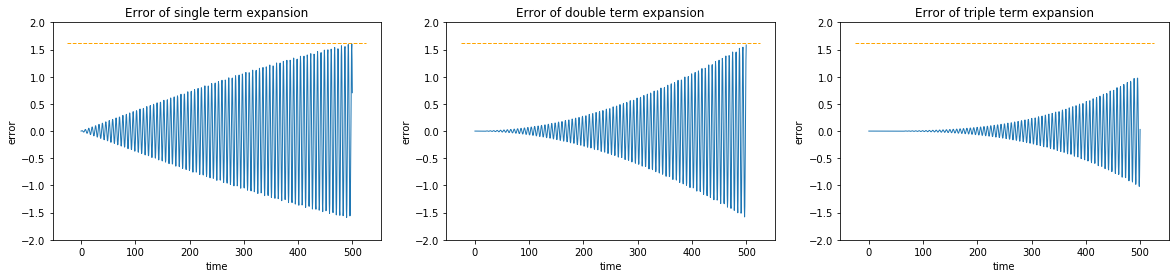

In [370]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4))

for ax, o, nr_terms in zip(axes, [o0, o1, o2], ['single', 'double', 'triple']):
    ax.set_ylim((-2, 2))
    ax.set_title(f'Error of {nr_terms} term expansion')
    ax.set_xlabel('time')
    ax.set_ylabel('error')
    ax.plot(t, x_real_sol[:, 0] - o(t), linewidth=1)
    ax.hlines(1.62, *ax.get_xlim(), linestyle='--', color='orange', linewidth=1)

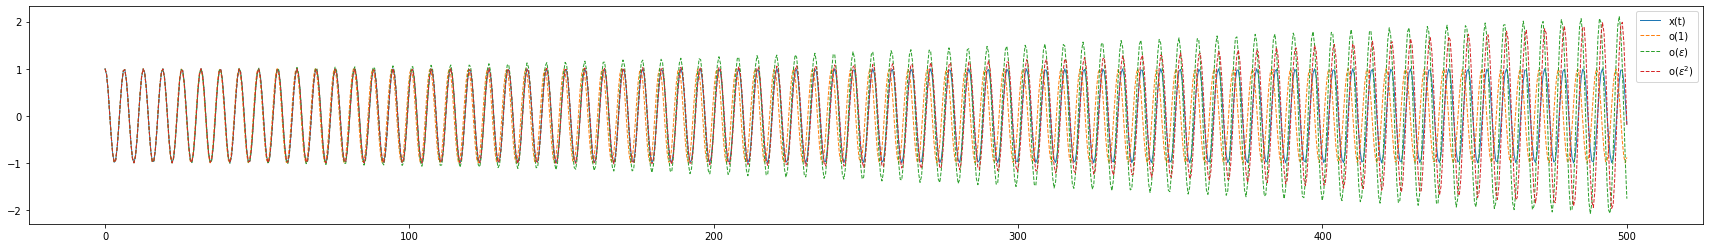

In [361]:
plt.figure(figsize=(30, 4))
t = np.linspace(0, 500, 1000)

plt.plot(t, x_real_sol[:, 0], label='x(t)', linewidth=1)

for name, o in zip(['o(1)', 'o($\\epsilon$)', 'o($\\epsilon^2$)'], [o0, o1, o2]):
    plt.plot(t, o(t), label=name ,linestyle='--', linewidth=1)
    
plt.legend()
plt.show()

#### Solution with Lindstedt-Poincaré technique

In [428]:
x0, x1, x2, x = map(sp.Function, ['x0', 'x1', 'x2', 'x'])
t, eps, w1, w2, tau = sp.symbols('t eps w1 w2 tau')

tau_val = (1 + eps*w1 + eps**2*w2) * t
x = x0(tau) + eps*x1(tau) + eps**2*x2(tau)
expr = (1 + eps*w1 + eps**2*w2)**2 * x.diff(tau, 2) + x - eps*x**3
equations = list(reversed(sp.Poly(expr, eps).coeffs()))[:3]
for eq in equations:
    display(eq)

x0(tau) + Derivative(x0(tau), (tau, 2))

2*w1*Derivative(x0(tau), (tau, 2)) - x0(tau)**3 + x1(tau) + Derivative(x1(tau), (tau, 2))

w1**2*Derivative(x0(tau), (tau, 2)) + 2*w1*Derivative(x1(tau), (tau, 2)) + 2*w2*Derivative(x0(tau), (tau, 2)) - 3*x0(tau)**2*x1(tau) + x2(tau) + Derivative(x2(tau), (tau, 2))

In [429]:
%%time
x0_val = sp.dsolve(equations[0], x0(tau), ics={x0(0): 1, x0(tau).diff(tau).subs({tau: 0}): 0}).rhs
x1_val = sp.dsolve(equations[1].subs({x0(tau): x0_val}), x1(tau), ics={x1(0): 0, x1(tau).diff(tau).subs({tau: 0}): 0}).rhs
x2_val = sp.dsolve(equations[2].subs({x0(tau): x0_val, x1(tau): x1_val}), x2(tau), ics={x2(0): 0, x2(tau).diff(tau).subs({tau: 0}): 0}).rhs

CPU times: user 1min 1s, sys: 12 ms, total: 1min 1s
Wall time: 1min 1s


In [430]:
x1_val

w1*cos(tau)**3 + (-w1 - 1/4)*cos(tau) + (tau*w1 + 3*tau/8 + w1*sin(2*tau)/2 + sin(2*tau)/4 + sin(4*tau)/32)*sin(tau) + cos(tau)**5/4

In [431]:
x2_val.subs({w1: -3/8})

(tau*w2 + 0.08203125*tau)*sin(tau) + (-0.78125*(1 - cos(2*tau))**3 + 1.56640625*(1 - cos(2*tau))**2 - 0.2724609375)*cos(tau) + 0.2724609375*cos(3*tau) + 0.09765625*cos(5*tau) - 0.09765625*cos(7*tau)

In [432]:
o0_term, o1_term, o2_term = map(
    lambda expr: expr.subs({w1: -3/8, w2: -21/256, tau: tau_val}).subs({eps: 0.01}), 
    [x0_val, x0_val + eps * x1_val, x0_val + eps * x1_val + eps**2*x2_val])

In [433]:
o0, o1, o2 = map(lambda o: sp.lambdify(t, o), [o0_term, o1_term, o2_term])

In [434]:
for o in [o0_term, o1_term, o2_term]:
    display(o)

cos(0.996241796875*t)

0.01*(0.0625*sin(1.99248359375*t) + sin(3.9849671875*t)/32)*sin(0.996241796875*t) + 0.0025*cos(0.996241796875*t)**5 - 0.00375*cos(0.996241796875*t)**3 + 1.00125*cos(0.996241796875*t)

0.01*(0.0625*sin(1.99248359375*t) + sin(3.9849671875*t)/32)*sin(0.996241796875*t) + 0.0001*(-0.78125*(1 - cos(1.99248359375*t))**3 + 1.56640625*(1 - cos(1.99248359375*t))**2 - 0.2724609375)*cos(0.996241796875*t) + 0.0025*cos(0.996241796875*t)**5 - 0.00375*cos(0.996241796875*t)**3 + 1.00125*cos(0.996241796875*t) + 2.724609375e-5*cos(2.988725390625*t) + 9.765625e-6*cos(4.981208984375*t) - 9.765625e-6*cos(6.973692578125*t)

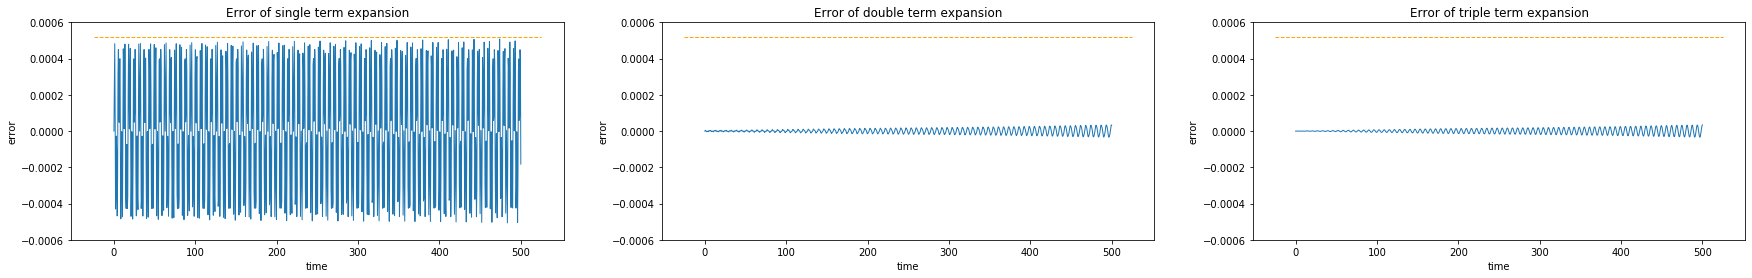

In [442]:
fig, axes = plt.subplots(1, 3, figsize=(30, 4))

t = np.linspace(0, 500, 1000)

for ax, o, nr_terms in zip(axes, [o0, o1, o2], ['single', 'double', 'triple']):
    ax.set_ylim((-0.0006, 0.0006))
    ax.set_title(f'Error of {nr_terms} term expansion')
    ax.set_xlabel('time')
    ax.set_ylabel('error')
    ax.plot(t, x_real_sol[:, 0] - o(t), linewidth=1)
    ax.hlines(0.00052, *ax.get_xlim(), linestyle='--', color='orange', linewidth=1)

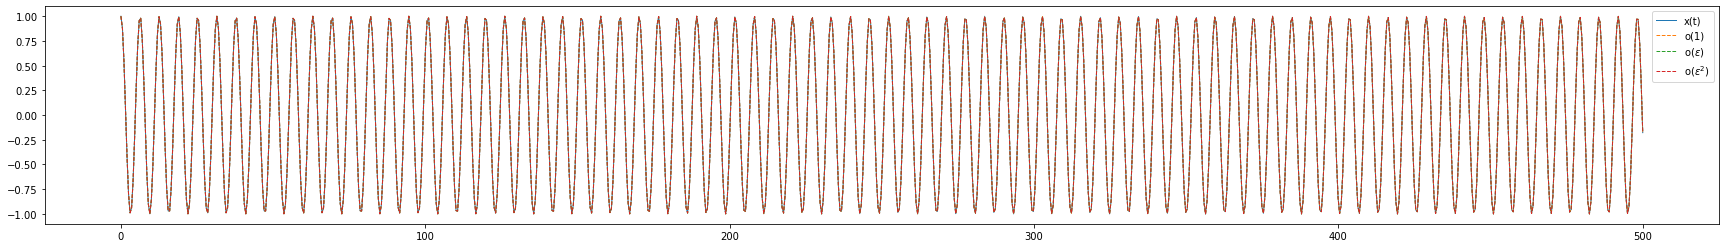

In [443]:
plt.figure(figsize=(30, 4))
t = np.linspace(0, 500, 1000)

plt.plot(t, x_real_sol[:, 0], label='x(t)', linewidth=1)

for name, o in zip(['o(1)', 'o($\\epsilon$)', 'o($\\epsilon^2$)'], [o0, o1, o2]):
    plt.plot(t, o(t), label=name ,linestyle='--', linewidth=1)
    
plt.legend()
plt.show()